# ML Project Paper 1

Introduction:

Objective: reproducing the results of Paper 1.

Dataset Overview: Telco-Customer-Churn dataset

Machine Learning Techniques: Logistic Regression, Decision Tree, Random Forest, XGBoost.

Structure:                                                          
*   1. Business Understanding
*   2. Data Understanding
*   3. Data Cleaning
*   4. Modeling & Evaluation
*   5. Advanced Techniques



# **Business Understanding**

 The telecom industry faces significant challenges in retaining customers due to intense competition, leading to substantial revenue losses. Customer churn prediction is crucial for telecom companies to identify high-risk customers and implement targeted retention strategies.

 ## Problem Statement :

Customer churn poses a significant challenge for telecom companies, leading to substantial revenue losses. Traditional methods of predicting churn often fall short, highlighting the need for more accurate and efficient prediction models. To address this issue, it is crucial to identify the key factors driving customer churn, as this understanding forms the foundation for developing effective customer retention strategies.

## Goals :

* Develop a predictive model that can accurately identify customers
at risk of churning.
* Identify the most significant factors contributing to customer churn.
* Evaluate the performance of different machine learning algorithms in predicting customer churn.
* Provide insights for telecom companies to develop targeted retention strategies and improve customer satisfaction.

# **Data Understanding**




## Imports

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

In [77]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler



----



## Dataset Treatment

We first combined the datasets

In [78]:
train_df = pd.read_csv('churn-bigml-80.csv')
test_df = pd.read_csv('churn-bigml-20.csv')

combined_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)


# Display the combined DataFrame
print("\nCombined Dataset Shape:", combined_df.shape)



Combined Dataset Shape: (3333, 20)


In [79]:
combined_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [80]:
# Describe the columns
print("Dataset Description:")
print(combined_df.describe(include='all'))

Dataset Description:
       State  Account length    Area code International plan Voice mail plan  \
count   3333     3333.000000  3333.000000               3333            3333   
unique    51             NaN          NaN                  2               2   
top       WV             NaN          NaN                 No              No   
freq     106             NaN          NaN               3010            2411   
mean     NaN      101.064806   437.182418                NaN             NaN   
std      NaN       39.822106    42.371290                NaN             NaN   
min      NaN        1.000000   408.000000                NaN             NaN   
25%      NaN       74.000000   408.000000                NaN             NaN   
50%      NaN      101.000000   415.000000                NaN             NaN   
75%      NaN      127.000000   510.000000                NaN             NaN   
max      NaN      243.000000   510.000000                NaN             NaN   

        Number vma

In [81]:
# Note the target variable
target_variable = 'Churn'
print(f"\nTarget Variable: {target_variable}")


Target Variable: Churn


### Exploratory Data Analysis (EDA)

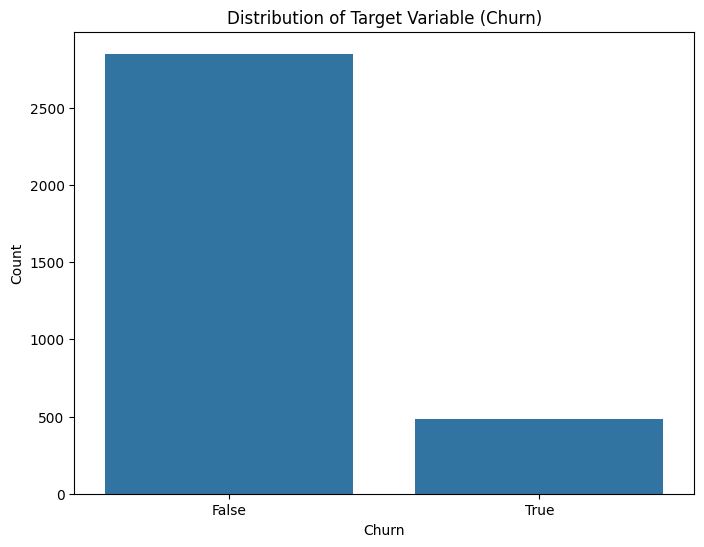

In [82]:
# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=target_variable, data=combined_df)
plt.title('Distribution of Target Variable (Churn)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

 Numeric Distribution

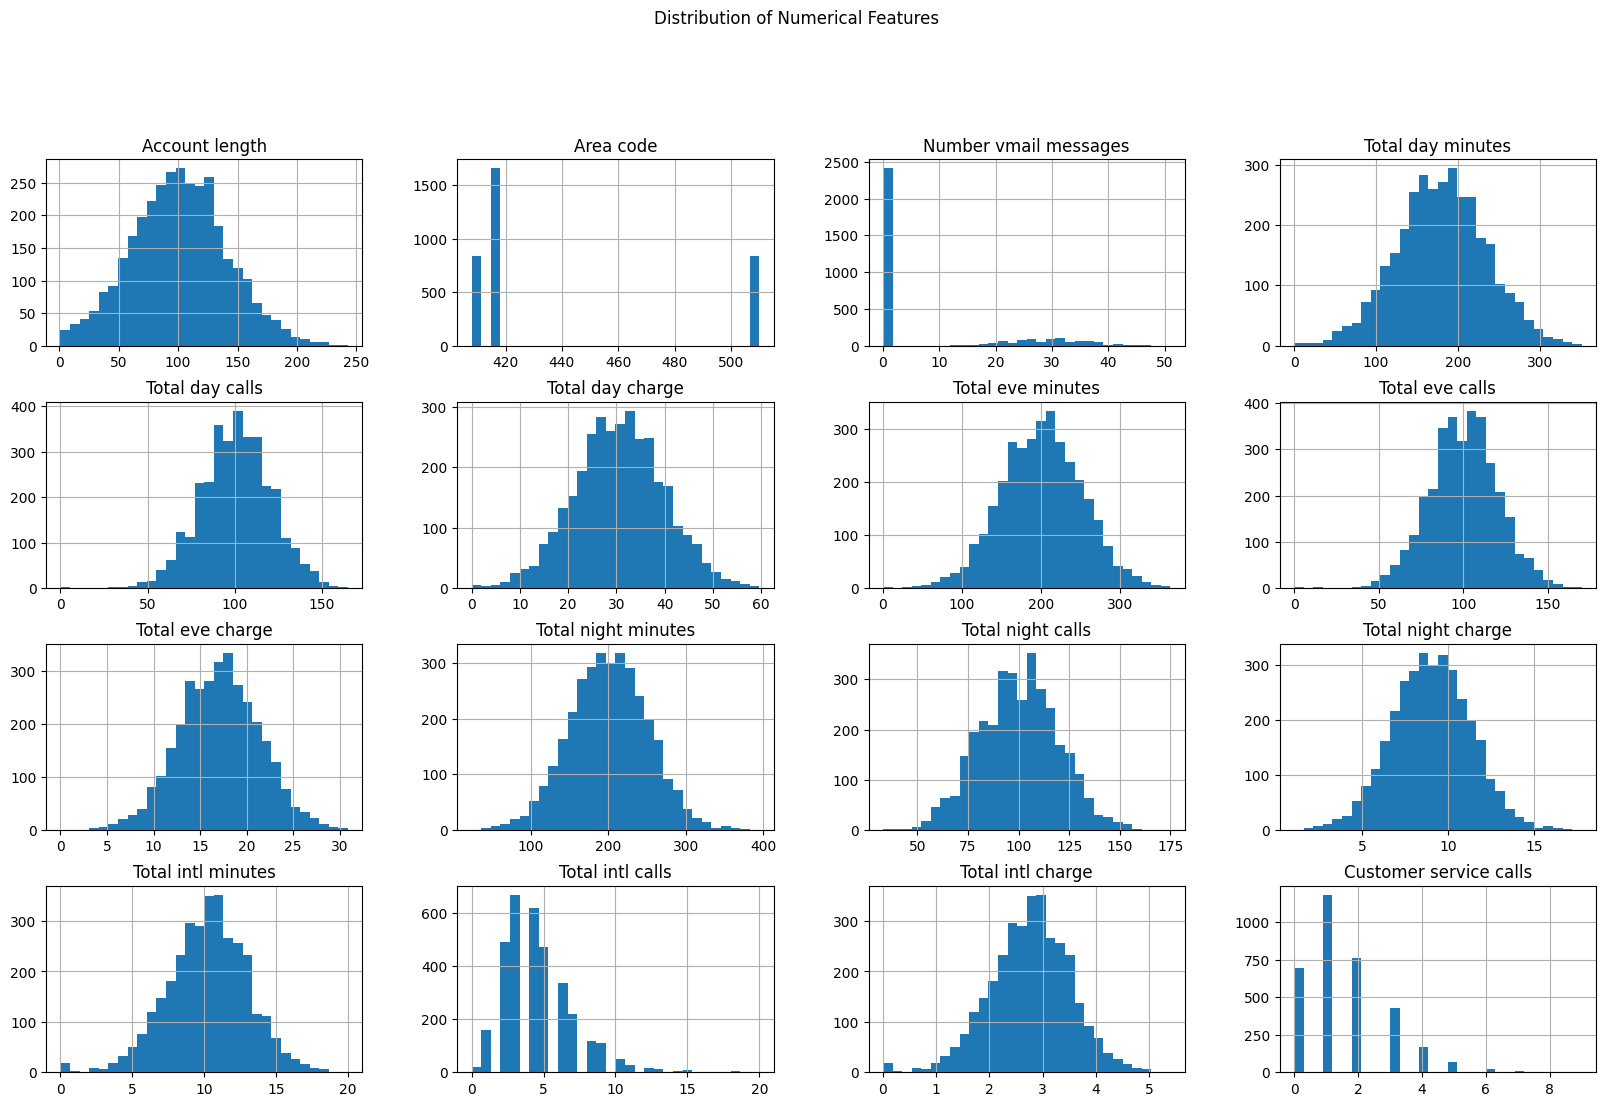

In [83]:
# Distribution of numerical features
numeric_features = combined_df.select_dtypes(include=[np.number]).columns.tolist()
combined_df[numeric_features].hist(figsize=(20, 15), bins=30, layout=(5, 4))
plt.suptitle('Distribution of Numerical Features')
plt.show()

Categorical Distribution

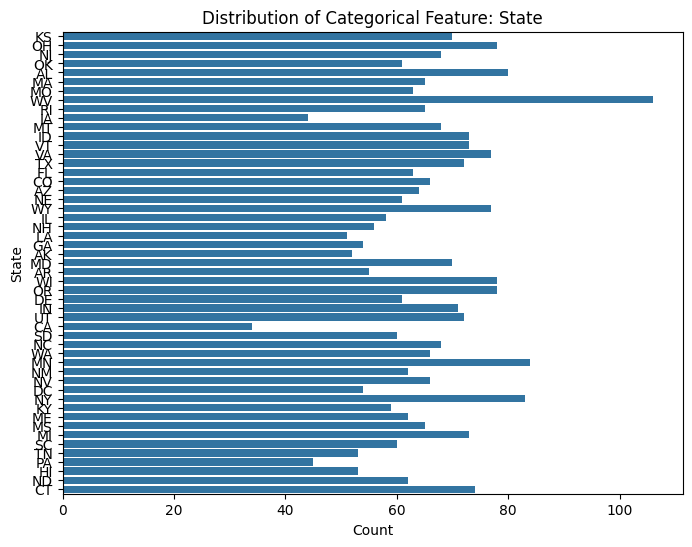

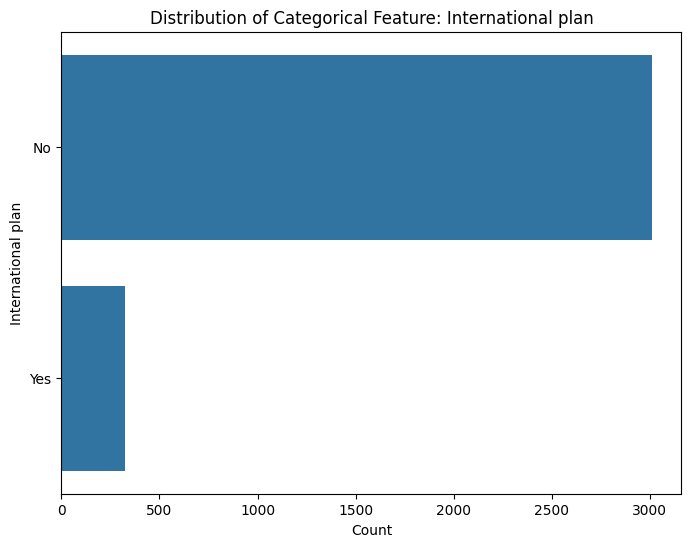

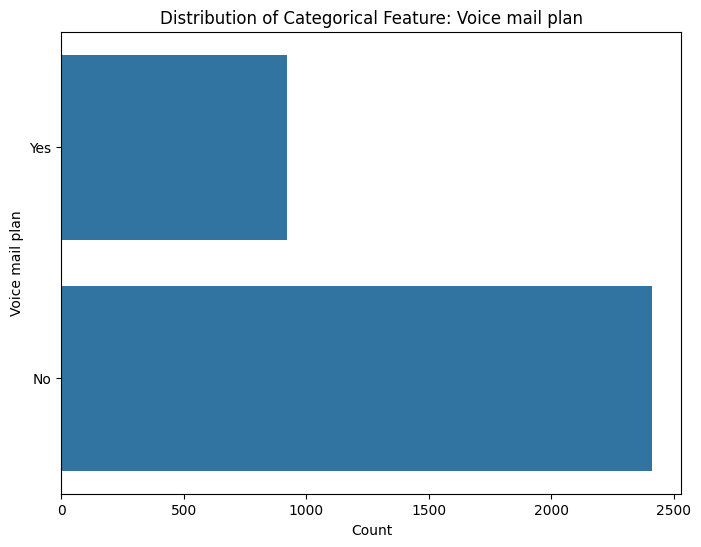

In [84]:
# Distribution of categorical features
categorical_features = combined_df.select_dtypes(include=['object']).columns.tolist()
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(y=feature, data=combined_df)
    plt.title(f'Distribution of Categorical Feature: {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.show()



----

# **Data Cleaning**


## Missing values

In [85]:
#Check for missing values
print("Missing values in dataset:\n", combined_df.isnull().sum())

Missing values in dataset:
 State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


***No Missing values found***

## Data Types

In [86]:
#Check for inconsistent data types or values
print("\nData types in the dataset:\n", combined_df.dtypes)


Data types in the dataset:
 State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object


## Treating Outliers

Outliers Summary Before Handling:
                        Outlier Count  Percentage
Account length                   18.0    0.540054
Area code                         0.0    0.000000
Number vmail messages             1.0    0.030003
Total day minutes                25.0    0.750075
Total day calls                  23.0    0.690069
Total day charge                 25.0    0.750075
Total eve minutes                24.0    0.720072
Total eve calls                  20.0    0.600060
Total eve charge                 24.0    0.720072
Total night minutes              30.0    0.900090
Total night calls                22.0    0.660066
Total night charge               30.0    0.900090
Total intl minutes               46.0    1.380138
Total intl calls                 78.0    2.340234
Total intl charge                49.0    1.470147
Customer service calls          267.0    8.010801


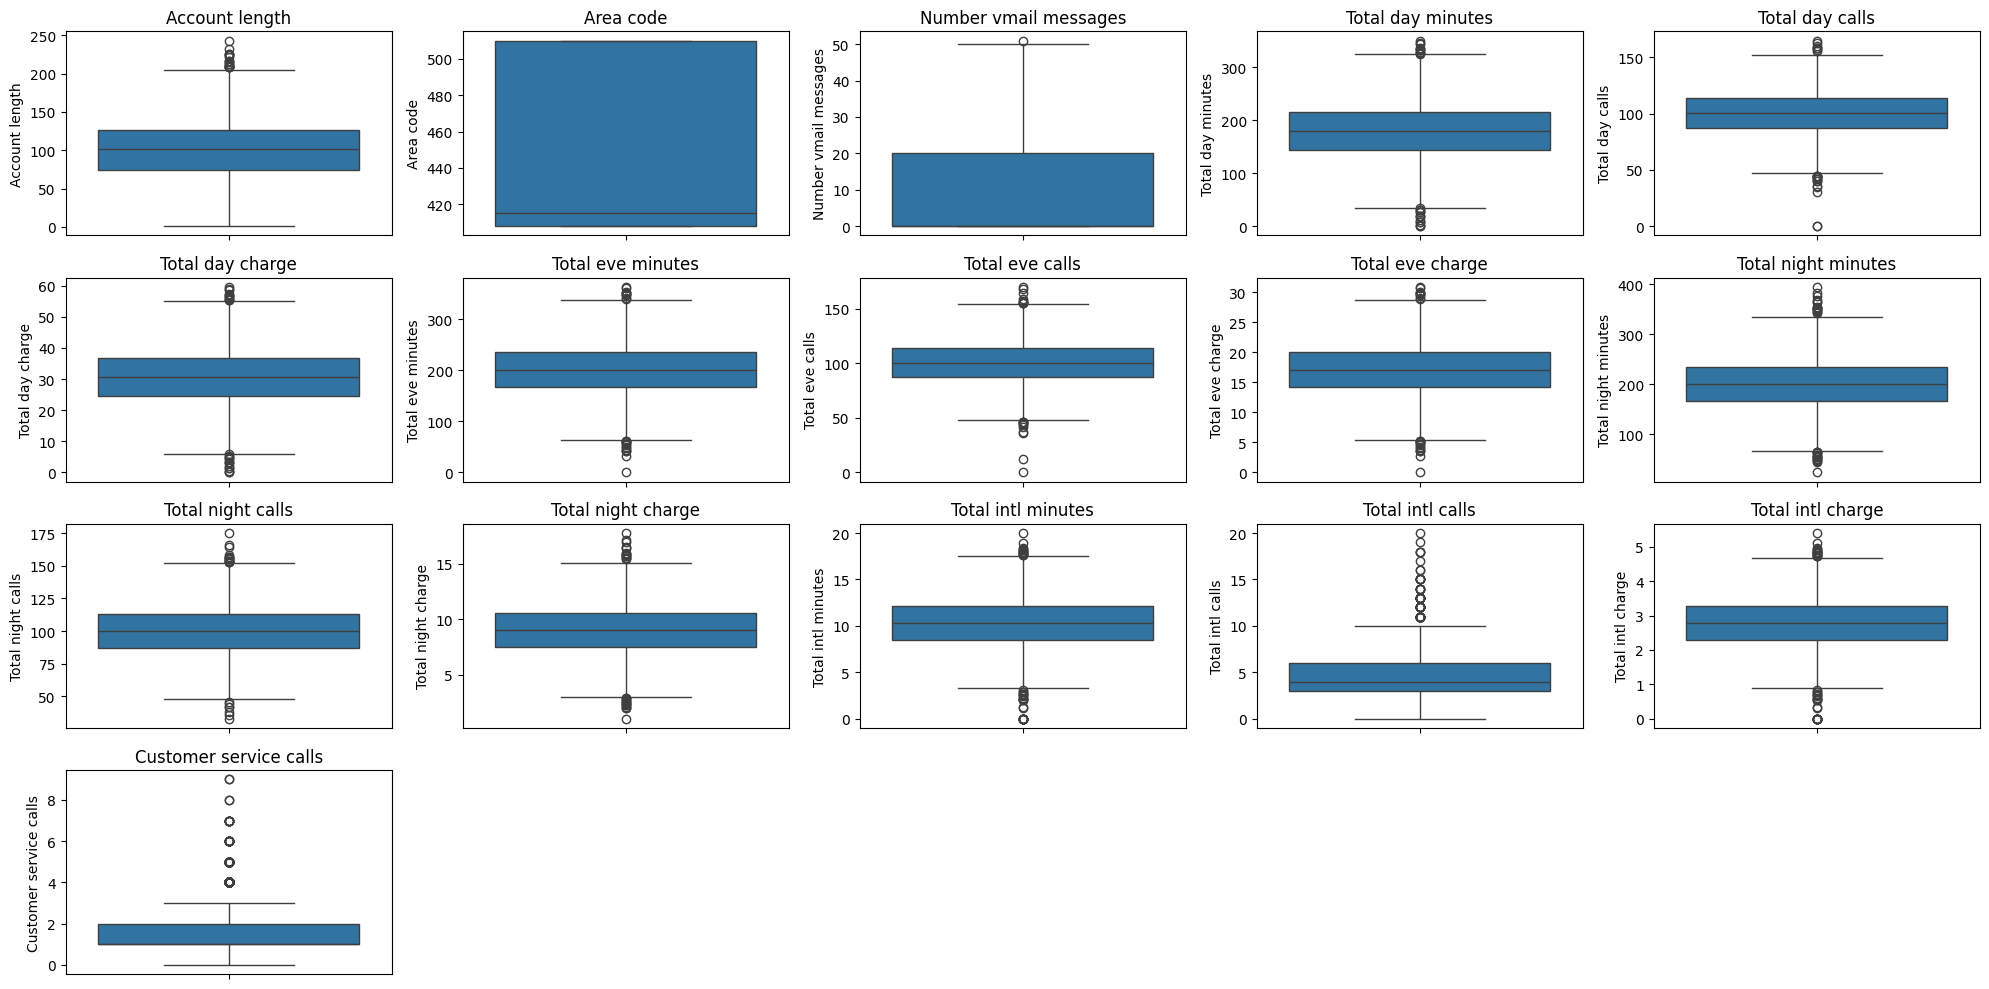

In [87]:
# Function to identify outliers using IQR
def find_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Identify numeric columns
numeric_cols = combined_df.select_dtypes(include=np.number).columns.tolist()


# View outliers before handling
total_rows = combined_df.shape[0]
outliers_info = {}

# Check outliers for each numeric column
for col in numeric_cols:
    outliers = find_outliers(combined_df, col)
    outlier_count = outliers.shape[0]
    percentage = (outlier_count / total_rows) * 100
    outliers_info[col] = {"count": outlier_count, "percentage": percentage}

# Display summary of outliers
outliers_summary = pd.DataFrame(outliers_info).T
outliers_summary.columns = ["Outlier Count", "Percentage"]
print("Outliers Summary Before Handling:")
print(outliers_summary)

# Visualize outliers before handling (only continuous variables)
plt.figure(figsize=(20, 10))

# Plot boxplots for numeric columns (continuous data)
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=combined_df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


Customer service calls has 8% of its values as outliers,but we will keep them because they are important in Survival Analysis  





In [88]:
columns_to_remove_outliers = []
for col, info in outliers_info.items():
    if info["percentage"] < 5:
        columns_to_remove_outliers.append(col)

print("\nColumns to remove outliers from (less than 5% outliers):", columns_to_remove_outliers)


Columns to remove outliers from (less than 5% outliers): ['Account length', 'Area code', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge']


In [89]:
def remove_outliers(df):
    df_cleaned = df.copy()
    for col in columns_to_remove_outliers:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

combined_df_cleaned = remove_outliers(combined_df)


Total Rows Before Outlier Removal: 3333
Total Rows After Outlier Removal: 3053
Outliers Removed: 280 (8.40%)


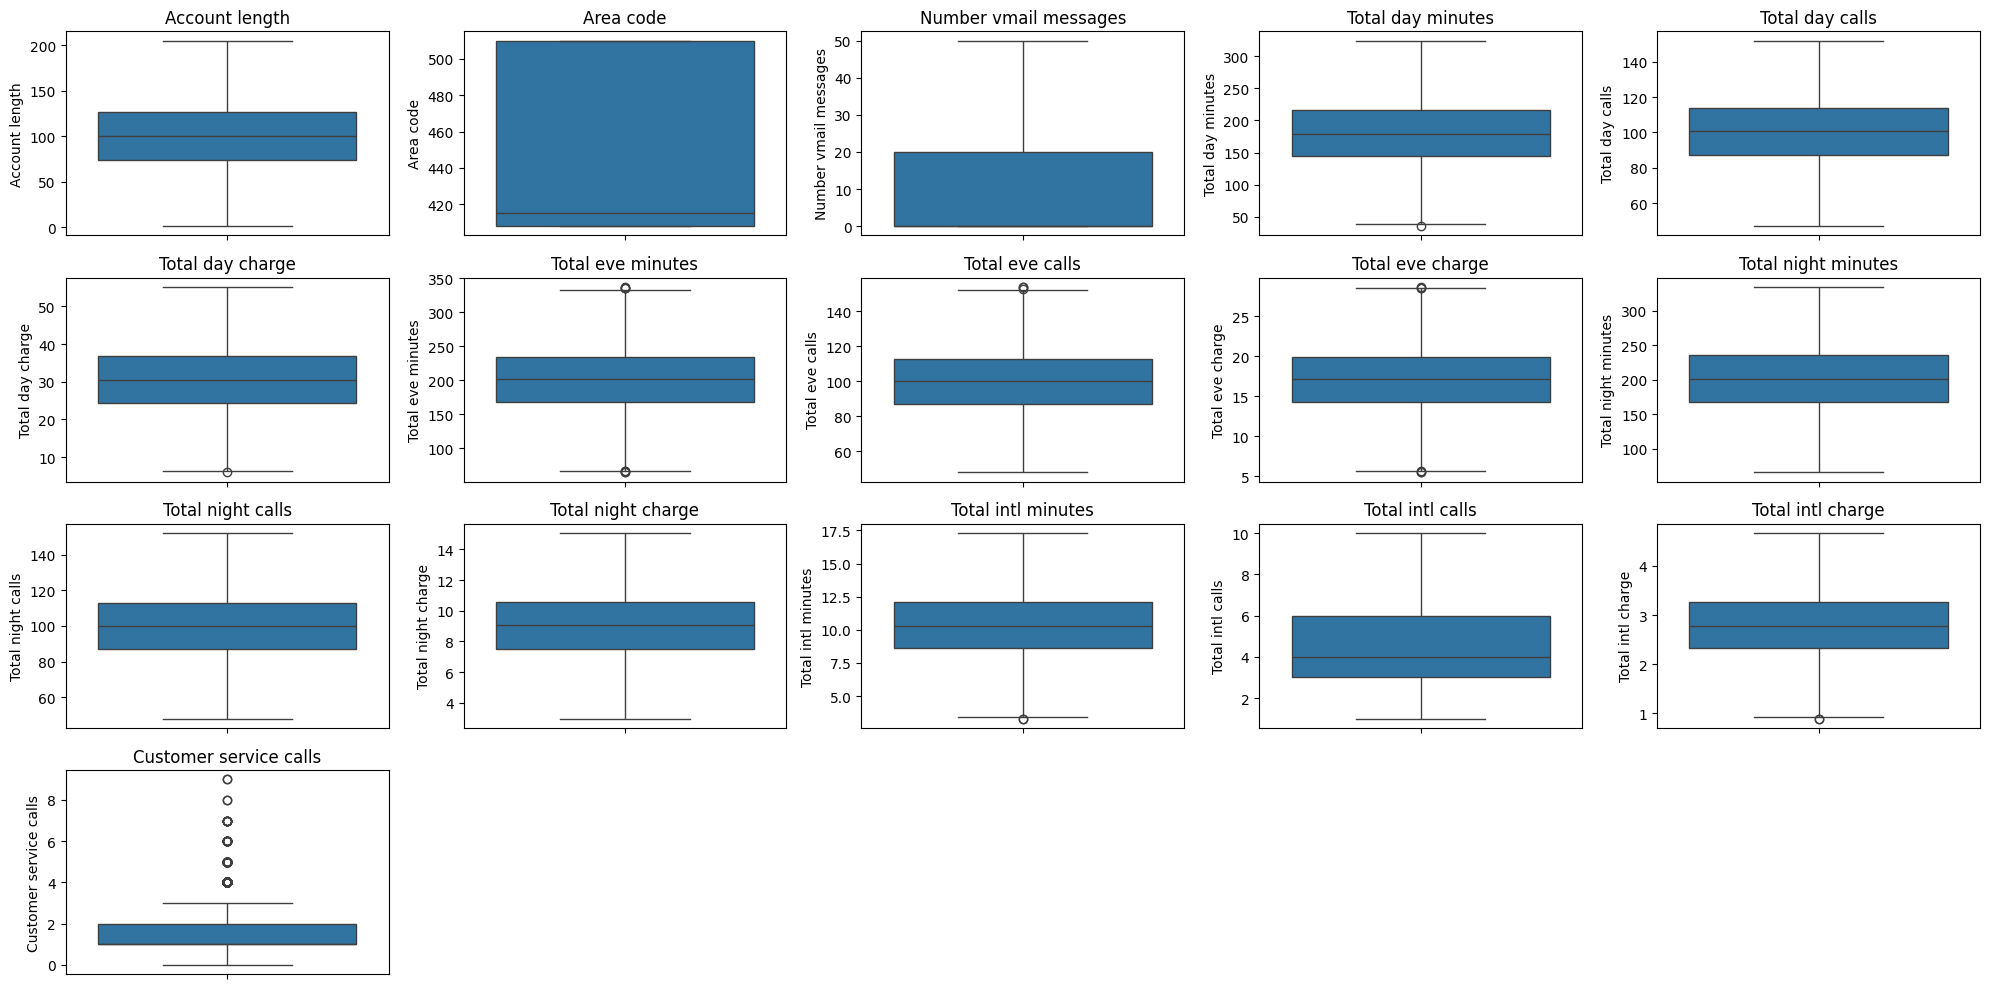

In [90]:
# View outliers after handling
total_rows_cleaned = combined_df_cleaned.shape[0]
outliers_removed = total_rows - total_rows_cleaned
percentage_removed = (outliers_removed / total_rows) * 100

print(f"\nTotal Rows Before Outlier Removal: {total_rows}")
print(f"Total Rows After Outlier Removal: {total_rows_cleaned}")
print(f"Outliers Removed: {outliers_removed} ({percentage_removed:.2f}%)")

# Visualize data after removing outliers (only continuous variables)
plt.figure(figsize=(20, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=combined_df_cleaned[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## Encoding

In [91]:
# 3. Encoding Categorical Variables
# Encode 'International plan', 'Voice mail plan' and 'churn'
label_encoder = LabelEncoder()
combined_df_cleaned['International plan'] = label_encoder.fit_transform(combined_df_cleaned['International plan'])
combined_df_cleaned['Voice mail plan'] = label_encoder.fit_transform(combined_df_cleaned['Voice mail plan'])
combined_df_cleaned['Churn'] = label_encoder.fit_transform(combined_df_cleaned['Churn'])



In [92]:
combined_df_cleaned = pd.get_dummies(combined_df_cleaned, columns=['State'], prefix='State')

# Convert all State columns to integers
state_columns = [col for col in combined_df_cleaned.columns if col.startswith('State_')]
combined_df_cleaned[state_columns] = combined_df_cleaned[state_columns].astype(int)

print(combined_df_cleaned.dtypes)  # Check data types to ensure they are integers
combined_df_cleaned.head()  # Verify the output


Account length           int64
Area code                int64
International plan       int64
Voice mail plan          int64
Number vmail messages    int64
                         ...  
State_VT                 int64
State_WA                 int64
State_WI                 int64
State_WV                 int64
State_WY                 int64
Length: 70, dtype: object


,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0
5,118,510,1,0,0,223.4,98,37.98,220.6,101,...,0,0,0,0,0,0,0,0,0,0


## Correlation

### correlation with target variable

Correlation with target (Churn):
Churn                     1.000000
International plan        0.251840
Customer service calls    0.218940
Total day minutes         0.186933
Total day charge          0.186928
                            ...   
State_AZ                 -0.030607
State_VA                 -0.035369
Total intl calls         -0.075953
Number vmail messages    -0.083501
Voice mail plan          -0.095121
Name: Churn, Length: 70, dtype: float64


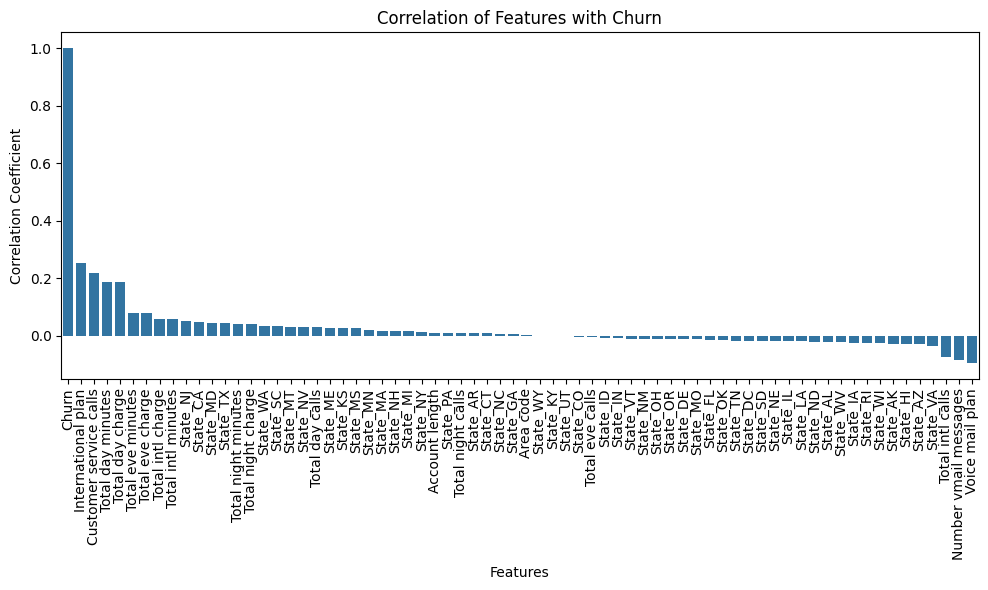

Features with low correlation (below 0.03): ['State_NV', 'Total day calls', 'State_ME', 'State_KS', 'State_MS', 'State_MN', 'State_MA', 'State_NH', 'State_MI', 'State_NY', 'Account length', 'State_PA', 'Total night calls', 'State_AR', 'State_CT', 'State_NC', 'State_GA', 'Area code', 'State_WY', 'State_KY', 'State_UT', 'State_CO', 'Total eve calls', 'State_ID', 'State_IN', 'State_VT', 'State_NM', 'State_OH', 'State_OR', 'State_DE', 'State_MO', 'State_FL', 'State_OK', 'State_TN', 'State_DC', 'State_SD', 'State_NE', 'State_IL', 'State_LA', 'State_ND', 'State_AL', 'State_WV', 'State_IA', 'State_RI', 'State_WI', 'State_AK', 'State_HI']


In [93]:

# 4. Correlation Analysis
correlation_with_target = combined_df_cleaned.corr()['Churn'].sort_values(ascending=False)
print("Correlation with target (Churn):")
print(correlation_with_target)

# Visualize correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.xticks(rotation=90)
plt.title('Correlation of Features with Churn')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

# Drop low-correlation features
threshold = 0.03
least_correlated_features = correlation_with_target[abs(correlation_with_target) < threshold].index.tolist()
print(f"Features with low correlation (below {threshold}): {least_correlated_features}")
combined_df_cleaned = combined_df_cleaned.drop(columns=least_correlated_features)


### correlation between all varaibles

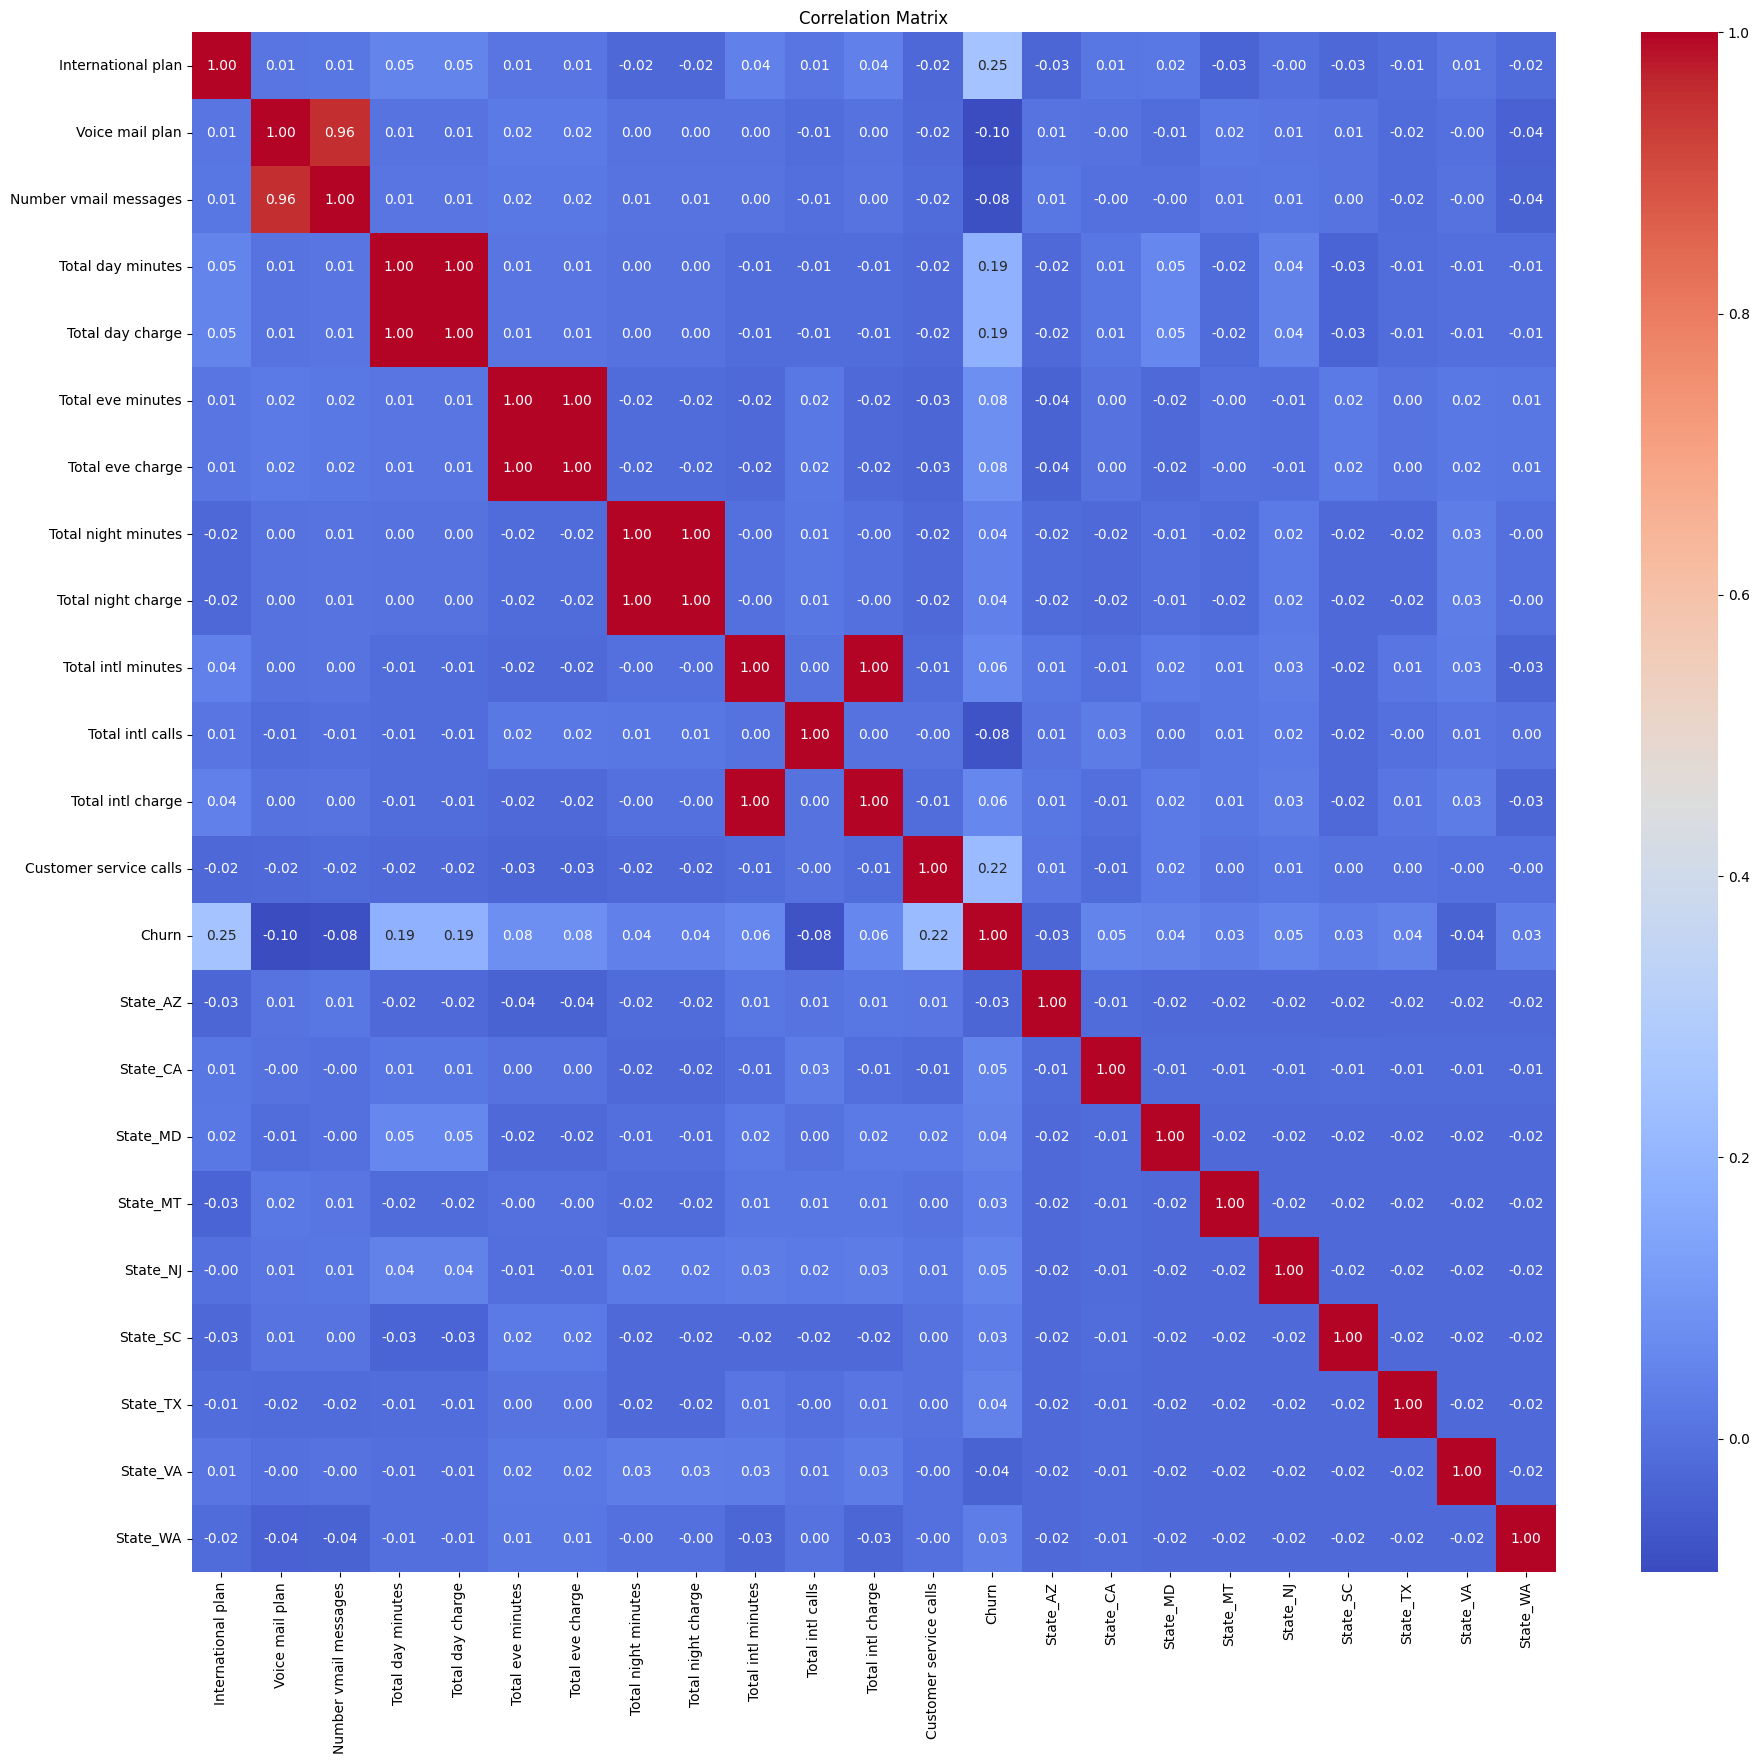

In [94]:
plt.figure(figsize=(22, 20))
correlation_matrix = combined_df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [95]:
# Drop the specified columns
columns_to_drop = ['Voice mail plan', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']
combined_df_cleaned = combined_df_cleaned.drop(columns=columns_to_drop, errors='ignore')


***Heavily correlated columns are removed***

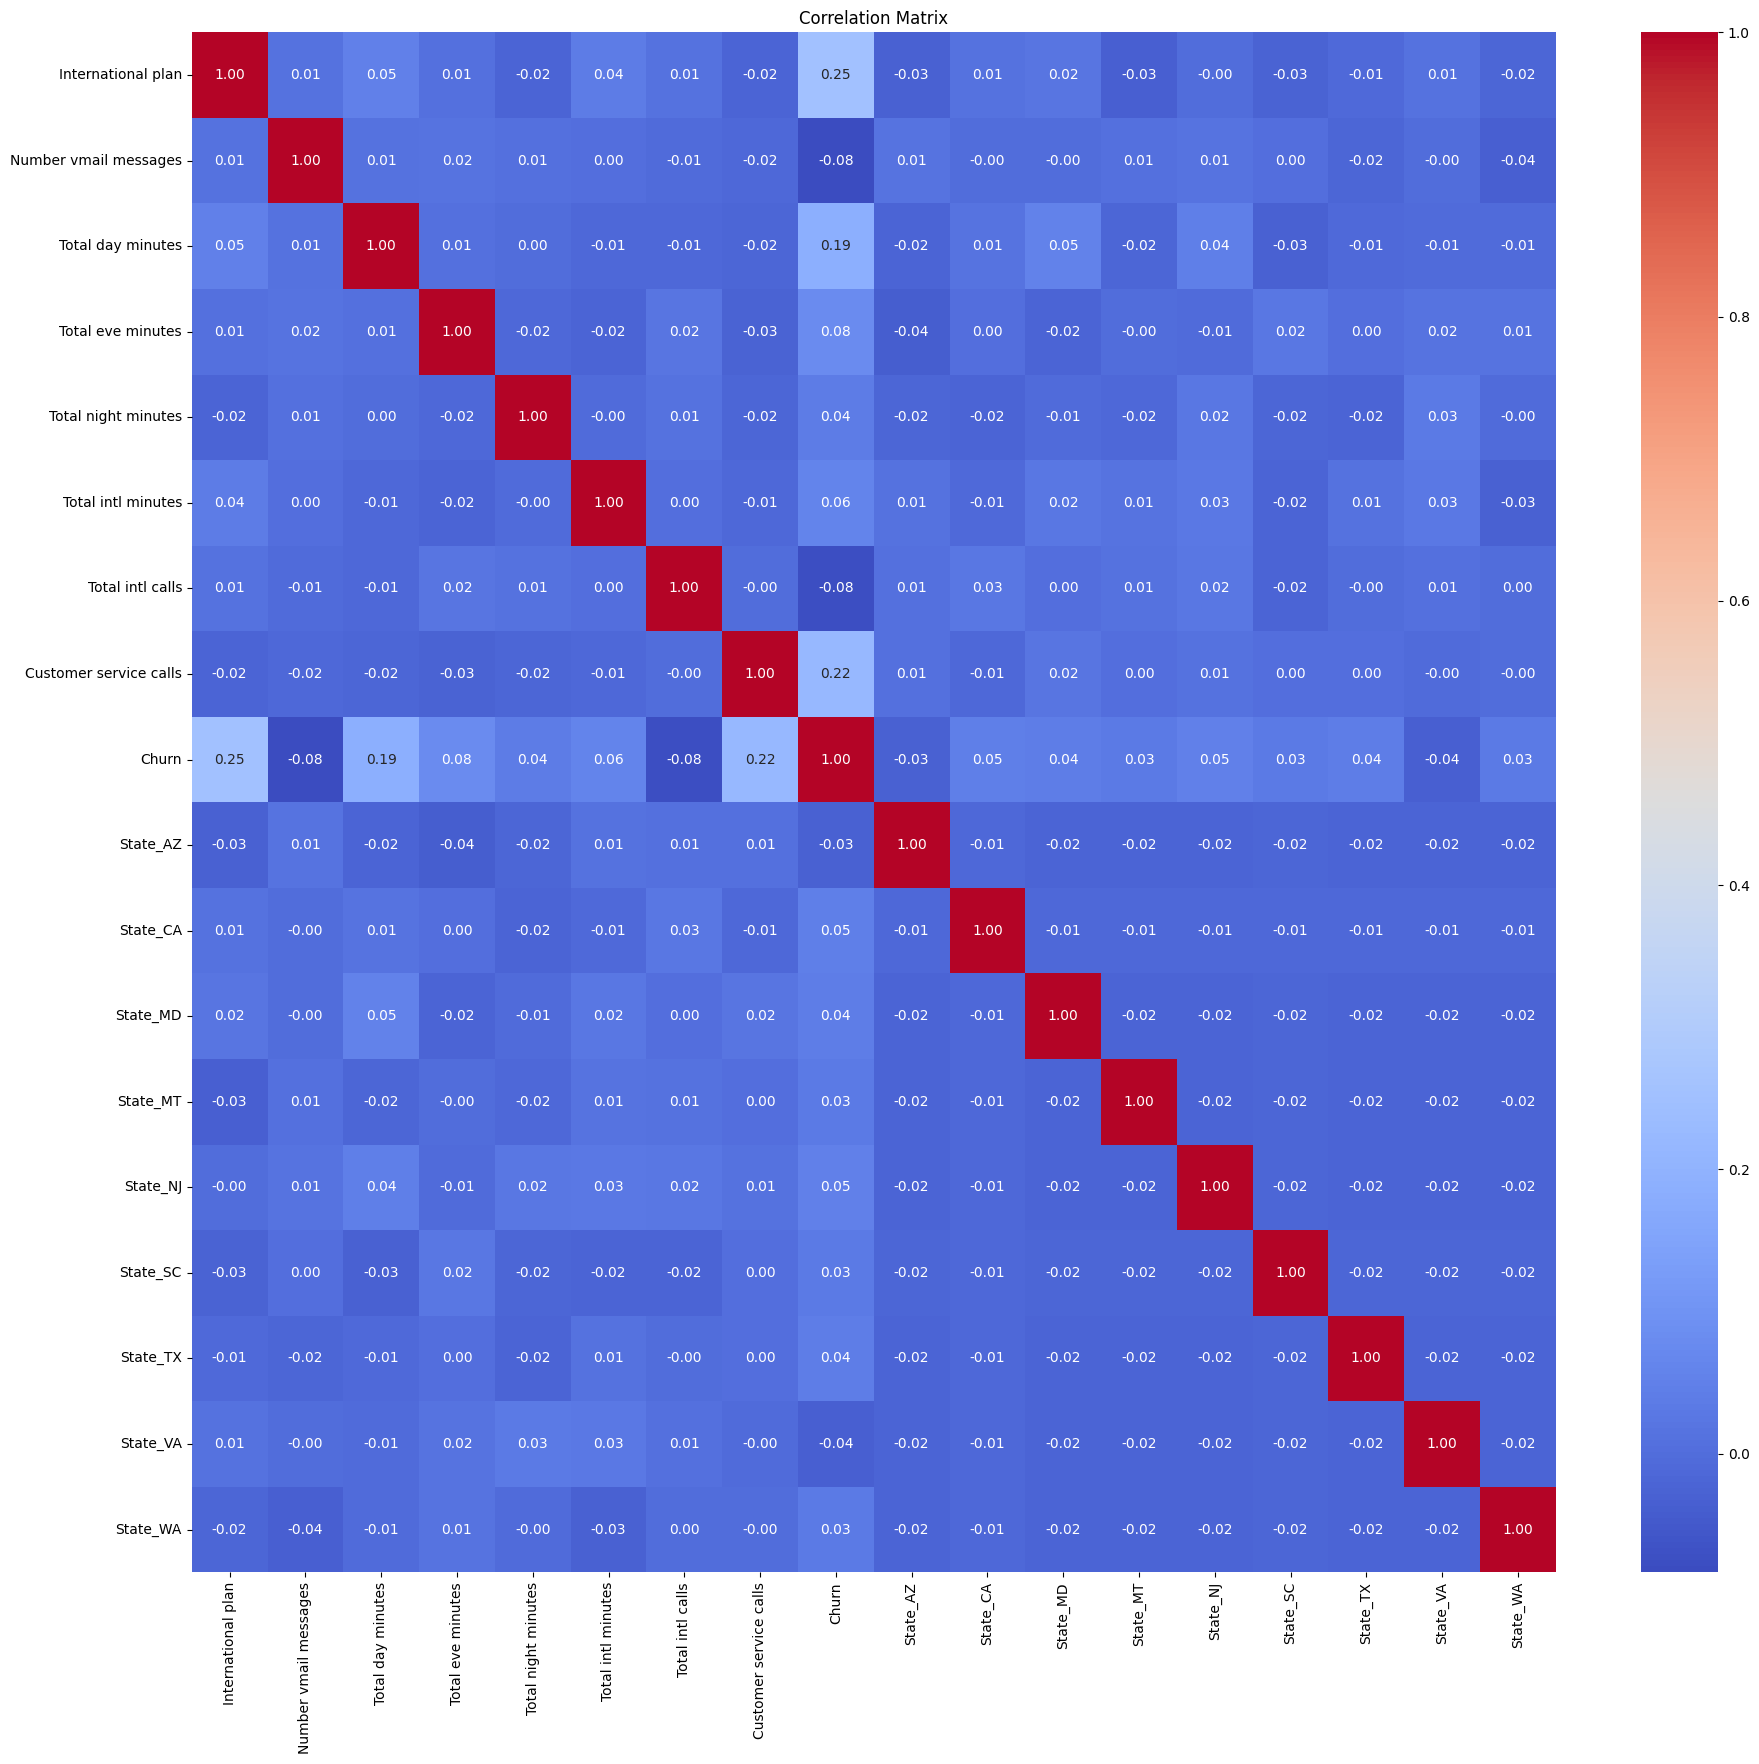

In [96]:
plt.figure(figsize=(22, 20))
correlation_matrix = combined_df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Data Balancing

### Testing

In [97]:
print(combined_df_cleaned['Churn'].value_counts())

Churn
0    2619
1     434
Name: count, dtype: int64


***The Churn Column is unbalanced***

### Balancing the Data Set

In [98]:
X = combined_df_cleaned.drop('Churn', axis=1)  # Features
y = combined_df_cleaned['Churn']  # Target

# Apply SMOTE for oversampling on the entire dataset (before splitting)
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Apply Edited Nearest Neighbours for undersampling
enn = EditedNearestNeighbours()
X_resampled, y_resampled = enn.fit_resample(X_smote, y_smote)

# Split the resampled data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Display the shape of the resulting splits
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (3810, 17), (3810,)
Testing set shape: (953, 17), (953,)


## Standardization

In [99]:
# Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)        # Only transform on test data

## PCA

### Applying PCA

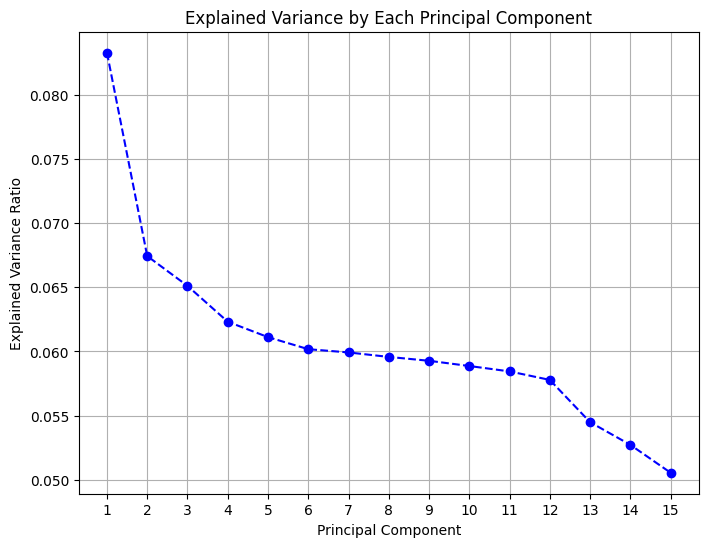

Number of variables left after PCA: 15


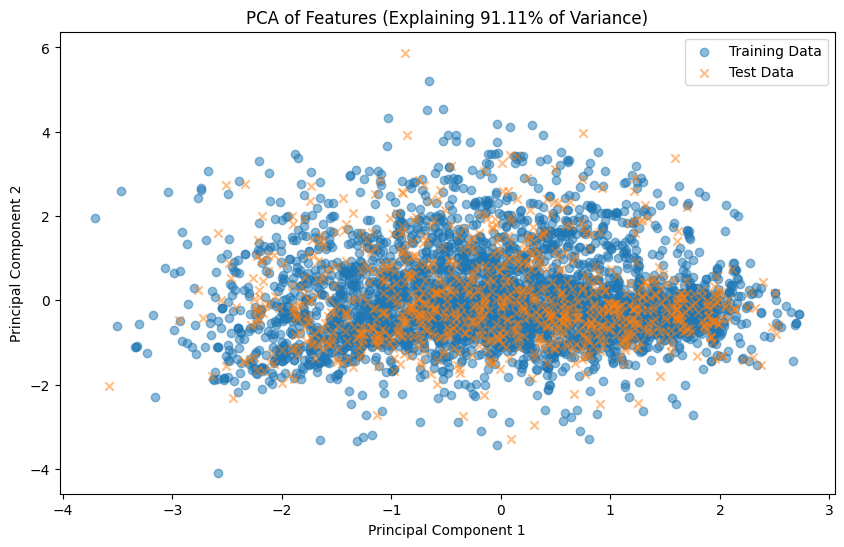

In [100]:
# PCA for dimensionality reduction (retain 90% of variance)
pca = PCA(n_components=0.9, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)  # Fit and transform on training data
X_test_pca = pca.transform(X_test_scaled)       # Only transform on test data

# Variation Plot (Explained Variance Plot)
plt.figure(figsize=(8, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='--', color='b')
plt.title("Explained Variance by Each Principal Component")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.xticks(range(1, pca.n_components_ + 1))
plt.grid(True)
plt.show()

# Display the number of variables (principal components) after PCA
print("Number of variables left after PCA:", pca.n_components_)

# Plot PCA results
plt.figure(figsize=(10, 6))

# Scatter plot for training data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.5, label='Training Data')

# Scatter plot for test data
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], alpha=0.5, label='Test Data', marker='x')

# Add title and labels
plt.title(f"PCA of Features (Explaining {round(pca.explained_variance_ratio_.sum() * 100, 2)}% of Variance)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


***We are left with 15 features***

### Quantitative Analysis and Visualization of Resampled Data


Feature Statistics Comparison:
                        Original Mean  Original Std  Resampled Mean  \
International plan           0.096299      0.295049        0.082931   
Number vmail messages        8.130691     13.714617        6.596683   
Total day minutes          179.869669     52.789826      193.681457   
Total eve minutes          201.093449     49.113342      206.475243   
Total night minutes        200.915427     48.695169      203.143923   
Total intl minutes          10.307632      2.586664       10.411056   
Total intl calls             4.298723      2.070637        4.023095   
Customer service calls       1.572879      1.325602        1.659458   
State_AZ                     0.019653      0.138827        0.012597   
State_CA                     0.009499      0.097014        0.005459   
State_MD                     0.021618      0.145457        0.013857   
State_MT                     0.021291      0.144375        0.013647   
State_NJ                     0.021618      0.

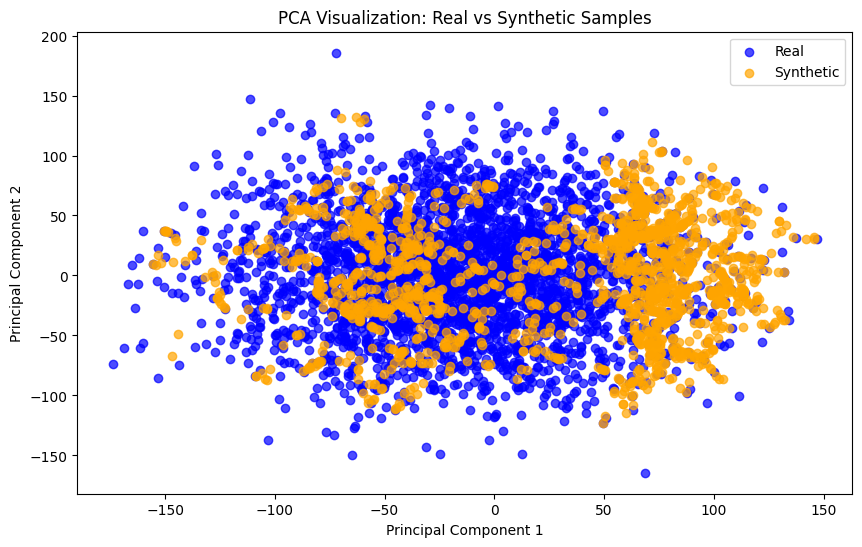

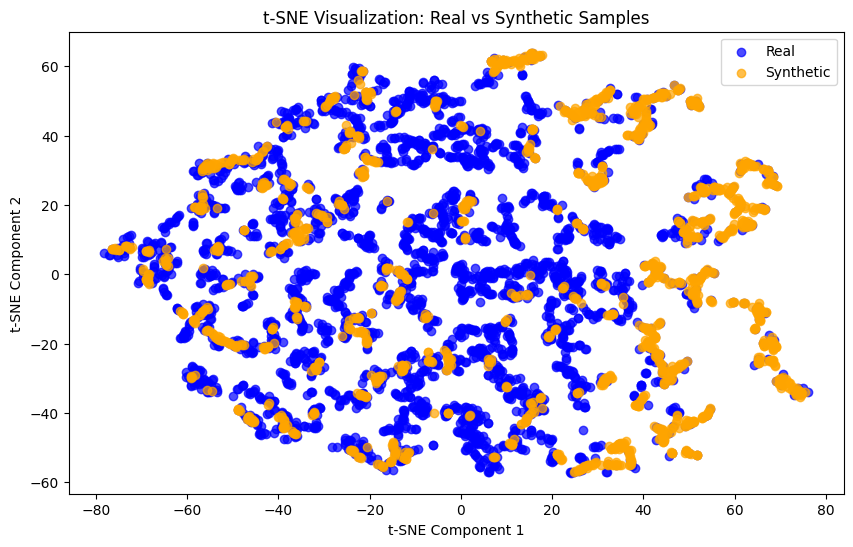

In [101]:
# Quantitative Comparison of Feature Distributions Before and After Resampling
feature_stats = pd.DataFrame({
    "Original Mean": X.mean(),
    "Original Std": X.std(),
    "Resampled Mean": X_resampled.mean(),
    "Resampled Std": X_resampled.std(),
})

print("\nFeature Statistics Comparison:")
print(feature_stats)

# PCA for Visualization of Real vs Synthetic Data
original_sample_count = len(X)
synthetic_sample_count = len(X_resampled) - original_sample_count
labels = ['Real'] * original_sample_count + ['Synthetic'] * synthetic_sample_count

# PCA Visualization
pca = PCA(n_components=2, random_state=42)
X_combined_pca = pca.fit_transform(np.vstack([X, X_resampled[original_sample_count:]]))

plt.figure(figsize=(10, 6))
for label, color in zip(['Real', 'Synthetic'], ['blue', 'orange']):
    indices = np.array(labels) == label
    plt.scatter(X_combined_pca[indices, 0], X_combined_pca[indices, 1], alpha=0.7, label=label, c=color)
plt.title("PCA Visualization: Real vs Synthetic Samples")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# t-SNE for Visualization of Real vs Synthetic Data
tsne = TSNE(n_components=2, random_state=42)
X_combined_tsne = tsne.fit_transform(np.vstack([X, X_resampled[original_sample_count:]]))

plt.figure(figsize=(10, 6))
for label, color in zip(['Real', 'Synthetic'], ['blue', 'orange']):
    indices = np.array(labels) == label
    plt.scatter(X_combined_tsne[indices, 0], X_combined_tsne[indices, 1], alpha=0.7, label=label, c=color)
plt.title("t-SNE Visualization: Real vs Synthetic Samples")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.show()


# **Classification Models**


##Decision Tree Model

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       524
           1       0.81      0.80      0.81       429

    accuracy                           0.83       953
   macro avg       0.83      0.83      0.83       953
weighted avg       0.83      0.83      0.83       953



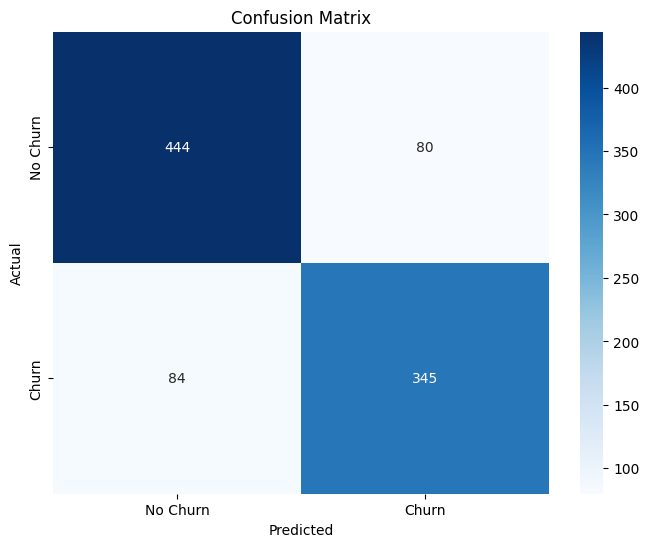

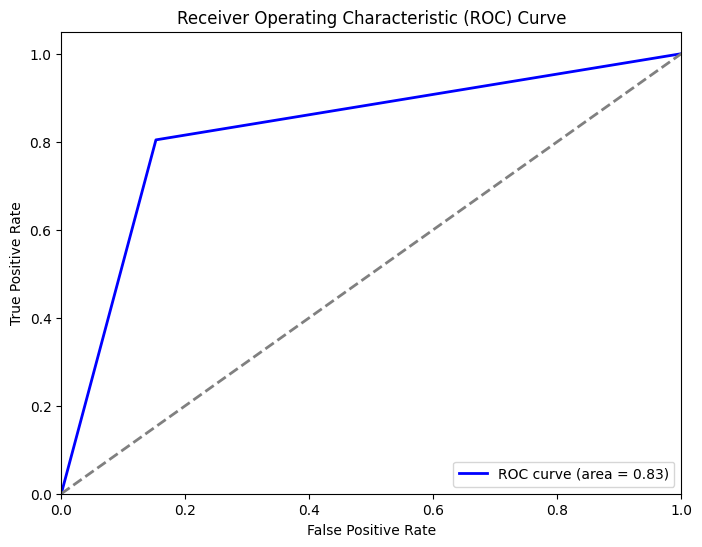

In [102]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train a Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test_pca)
y_pred_proba = decision_tree.predict_proba(X_test_pca)[:, 1]

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Random Forest Model


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       524
           1       0.92      0.83      0.87       429

    accuracy                           0.89       953
   macro avg       0.90      0.89      0.89       953
weighted avg       0.90      0.89      0.89       953



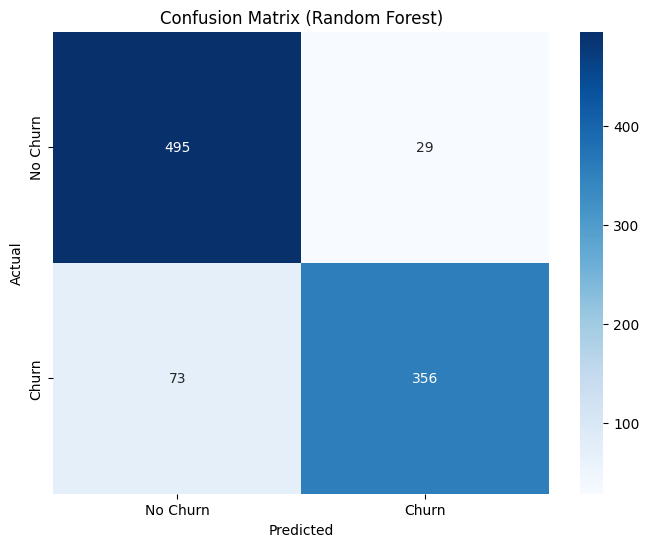

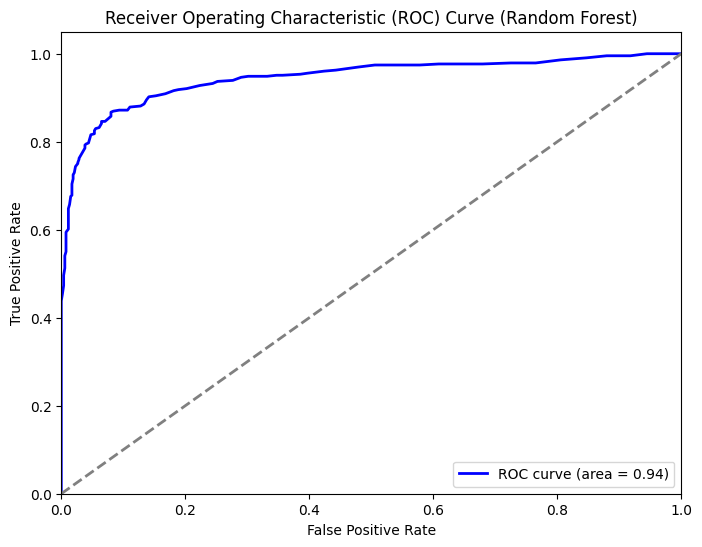

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train a Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_pca, y_train)

# Predict on the test set
y_pred_rf = random_forest.predict(X_test_pca)
y_pred_proba_rf = random_forest.predict_proba(X_test_pca)[:, 1]

# Generate and print the classification report
report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report (Random Forest):")
print(report_rf)

# Plot the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

# Plot the ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Random Forest)')
plt.legend(loc="lower right")
plt.show()

## XGBoost Model

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       524
           1       0.91      0.85      0.88       429

    accuracy                           0.90       953
   macro avg       0.90      0.89      0.89       953
weighted avg       0.90      0.90      0.89       953



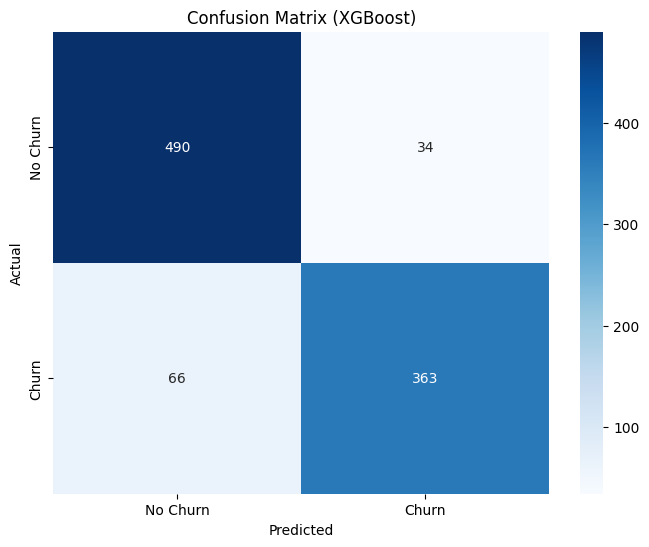

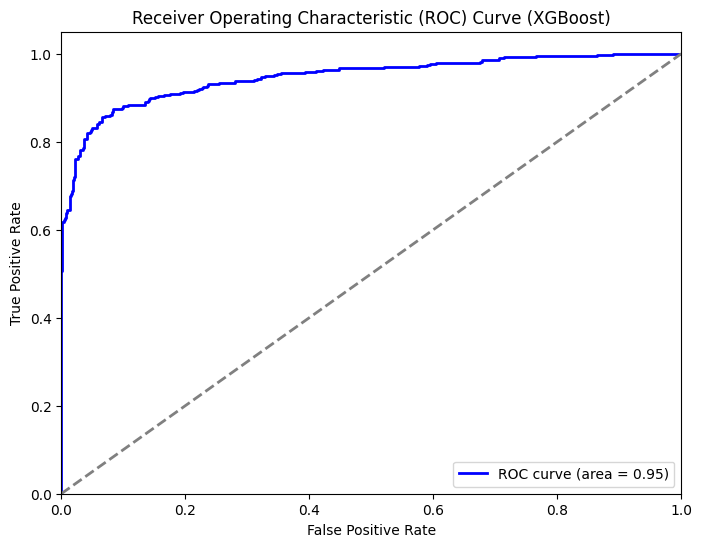

In [104]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train an XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_pca, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test_pca)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_pca)[:, 1]

# Generate and print the classification report
report_xgb = classification_report(y_test, y_pred_xgb)
print("Classification Report (XGBoost):")
print(report_xgb)

# Plot the confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost)')
plt.show()

# Plot the ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (XGBoost)')
plt.legend(loc="lower right")
plt.show()

##Logistic Regression Model

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       524
           1       0.70      0.68      0.69       429

    accuracy                           0.73       953
   macro avg       0.72      0.72      0.72       953
weighted avg       0.72      0.73      0.72       953



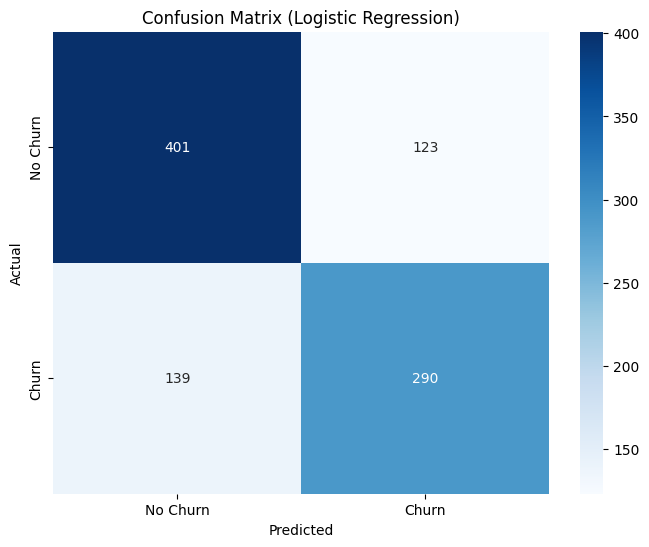

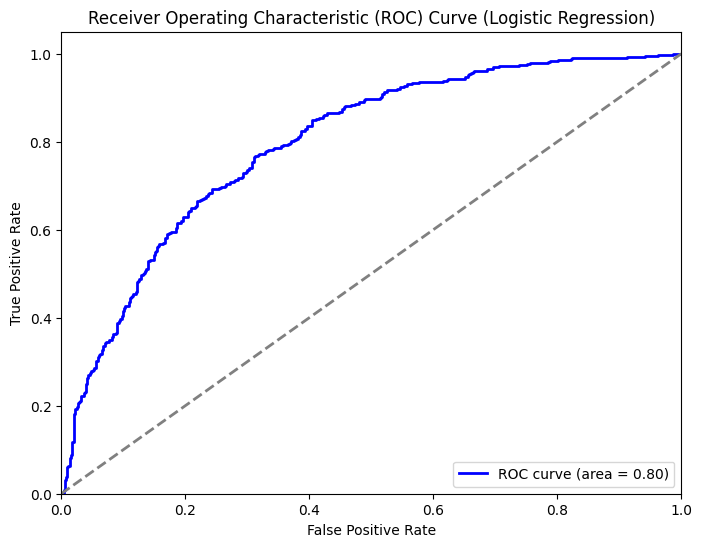

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train a Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_pca, y_train)

# Predict on the test set
y_pred_lr = log_reg.predict(X_test_pca)
y_pred_proba_lr = log_reg.predict_proba(X_test_pca)[:, 1]

# Generate and print the classification report
report_lr = classification_report(y_test, y_pred_lr)
print("Classification Report (Logistic Regression):")
print(report_lr)

# Plot the confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

# Plot the ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

## Models Comparison

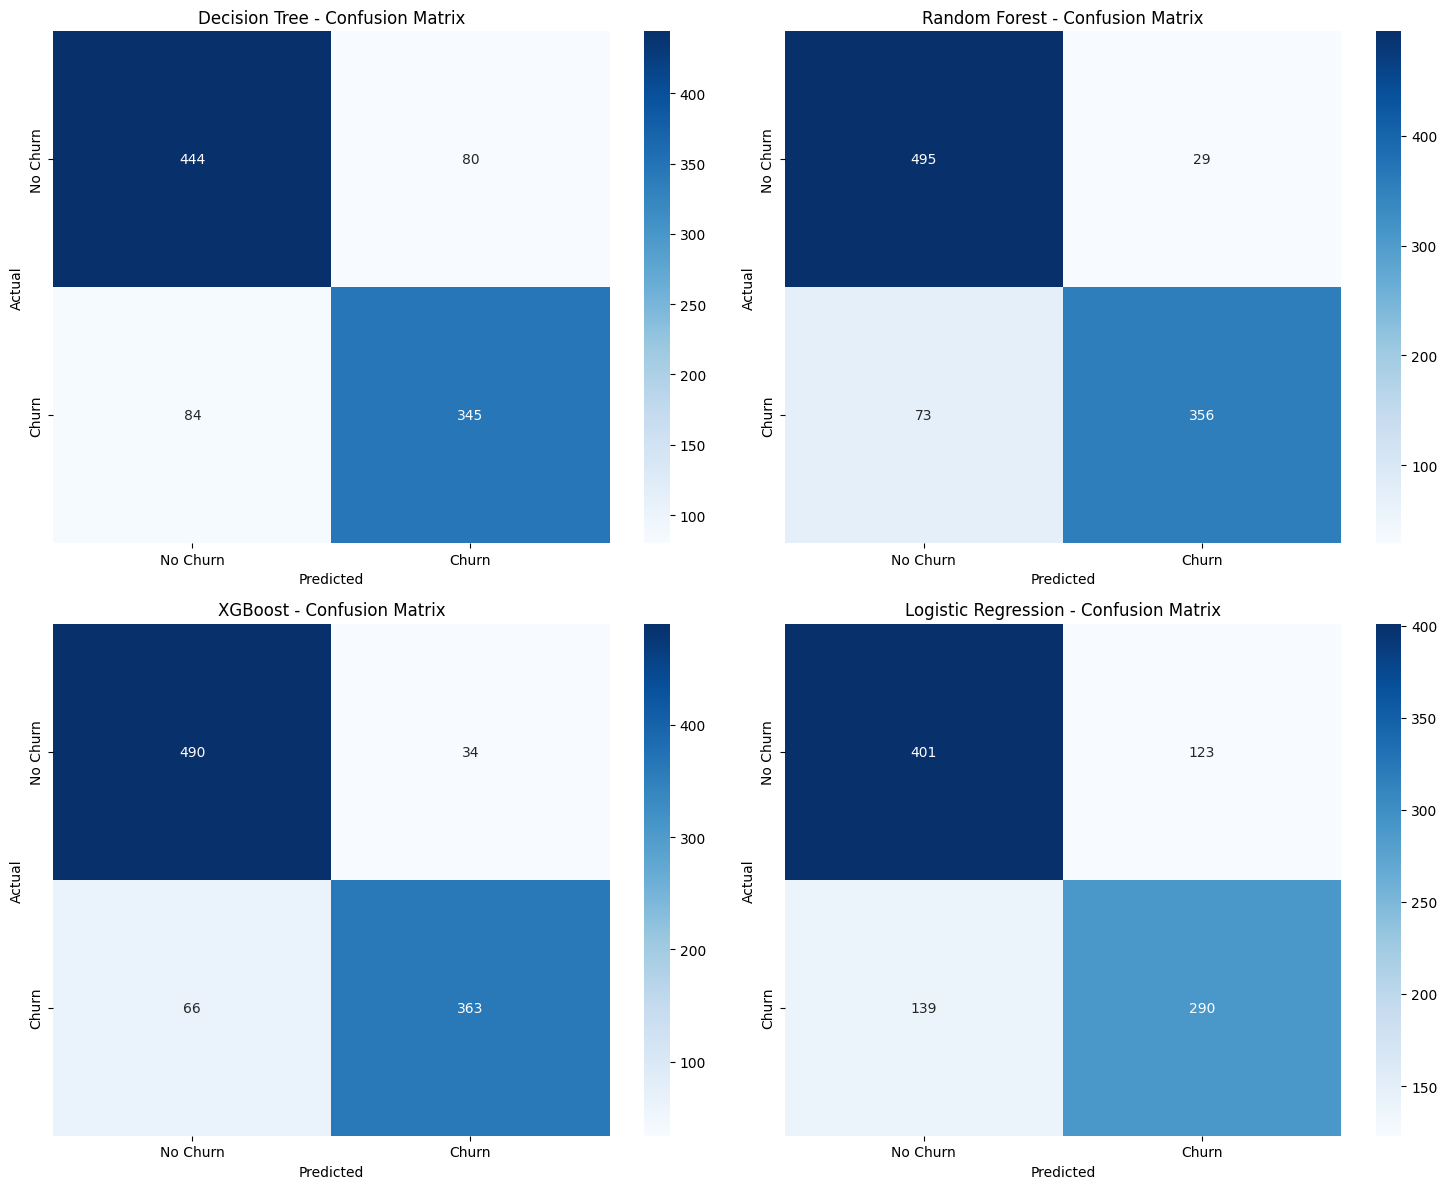

In [114]:
# Define the models and their names
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

# Train the models and store the results
conf_matrices = {}
roc_data = {}

for model_name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    y_pred_proba = model.predict_proba(X_test_pca)[:, 1]

    # Confusion matrix
    conf_matrices[model_name] = confusion_matrix(y_test, y_pred)

    # ROC data
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    roc_data[model_name] = (fpr, tpr, roc_auc)

# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for ax, (model_name, conf_matrix) in zip(axes, conf_matrices.items()):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    ax.set_title(f'{model_name} - Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

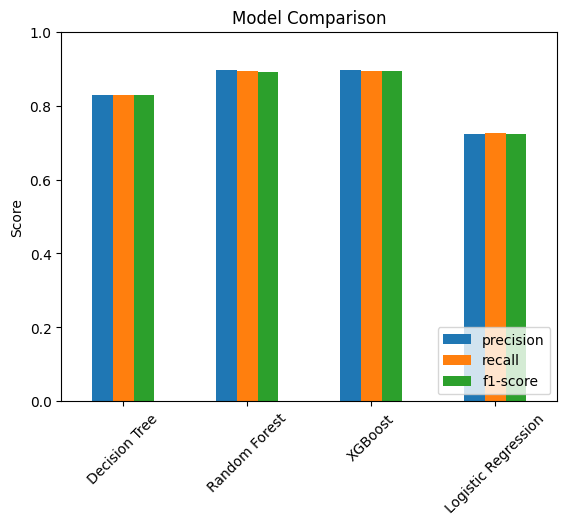

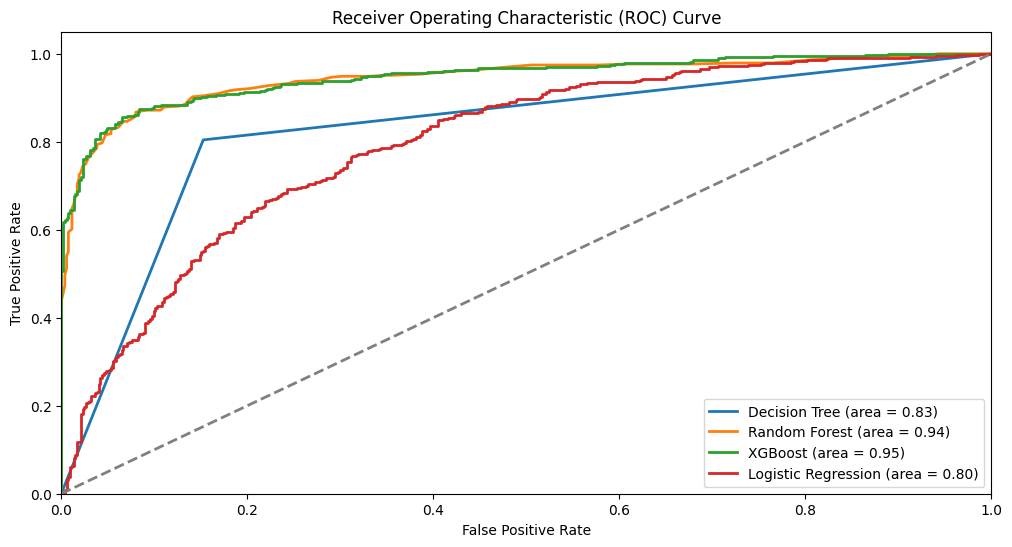

Accuracy Scores:
                     Accuracy
Decision Tree        0.827912
Random Forest        0.892970
XGBoost              0.895068
Logistic Regression  0.725079


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score

# Assuming X_train_pca, X_test_pca, y_train, y_test are already defined

# Train and evaluate models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

results = {}
roc_data = {}
accuracy_scores = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_pca, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_pca)
    y_pred_proba = model.predict_proba(X_test_pca)[:, 1]

    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    results[model_name] = report['weighted avg']

    # ROC data
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    roc_data[model_name] = (fpr, tpr, roc_auc)

    # Accuracy score
    accuracy_scores[model_name] = accuracy_score(y_test, y_pred)

# Bar plot for comparison
metrics = ['precision', 'recall', 'f1-score']
results_df = pd.DataFrame(results).T[metrics]

plt.figure(figsize=(12, 6))
results_df.plot(kind='bar')
plt.title('Model Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

# ROC plot for comparison
plt.figure(figsize=(12, 6))
for model_name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Table showing accuracy scores
accuracy_df = pd.DataFrame.from_dict(accuracy_scores, orient='index', columns=['Accuracy'])
print("Accuracy Scores:")
print(accuracy_df)



# **Models Testing**

##  XGBoost Test

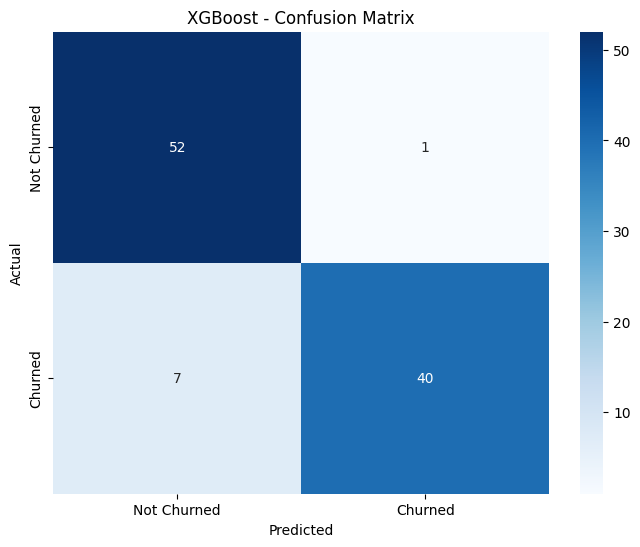

XGBoost - Precision: 0.975609756097561
XGBoost - Recall: 0.851063829787234
XGBoost - F1 Score: 0.9090909090909091
XGBoost - ROC AUC Score: 0.9486150140505821


In [107]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#X_train_pca
#X_test_pca

# Sample size
sample_size = 100

# Randomly select indices for sampling
sample_indices = np.random.choice(len(y_test), sample_size, replace=False)

# Sampled data
y_test_sample = y_test.iloc[sample_indices]
X_test_sample = X_test_pca[sample_indices]

# XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_pca, y_train)
y_pred_sample_xgb = xgb_classifier.predict(X_test_sample)

# XGBoost Evaluation Metrics
precision_sample_xgb = precision_score(y_test_sample, y_pred_sample_xgb)
recall_sample_xgb = recall_score(y_test_sample, y_pred_sample_xgb)
f1_sample_xgb = f1_score(y_test_sample, y_pred_sample_xgb)
cm_xgb_sample = confusion_matrix(y_test_sample, y_pred_sample_xgb)
y_prob_xgb_sample = xgb_classifier.predict_proba(X_test_sample)[:, 1]
roc_auc_xgb_sample = roc_auc_score(y_test_sample, y_prob_xgb_sample)

# Display Confusion Matrix as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_sample, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.title('XGBoost - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("XGBoost - Precision:", precision_sample_xgb)
print("XGBoost - Recall:", recall_sample_xgb)
print("XGBoost - F1 Score:", f1_sample_xgb)
print("XGBoost - ROC AUC Score:", roc_auc_xgb_sample)


## Random Forest Test

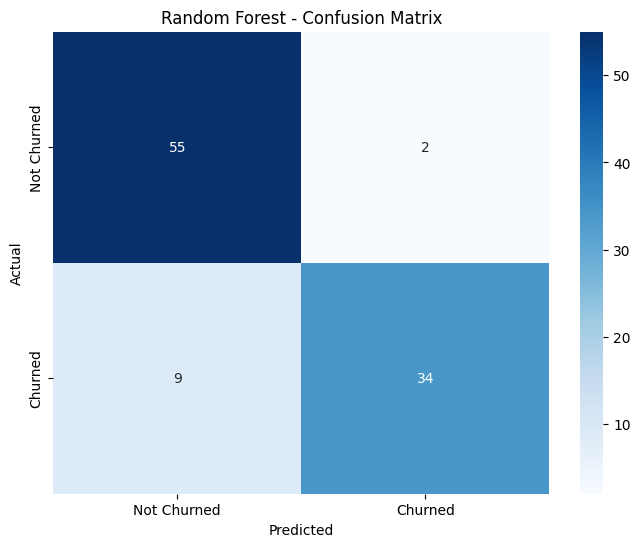

Random Forest - Precision: 0.9444444444444444
Random Forest - Recall: 0.7906976744186046
Random Forest - F1 Score: 0.8607594936708861
Random Forest - ROC AUC Score: 0.9339045287637698


In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample size
sample_size = 100

# Randomly select indices for sampling
sample_indices = np.random.choice(len(y_test), sample_size, replace=False)

# Sampled data
y_test_sample = y_test.iloc[sample_indices]
X_test_sample = X_test_pca[sample_indices]

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_pca, y_train)
y_pred_sample_rf = rf_classifier.predict(X_test_sample)

# Random Forest Evaluation Metrics
precision_sample_rf = precision_score(y_test_sample, y_pred_sample_rf)
recall_sample_rf = recall_score(y_test_sample, y_pred_sample_rf)
f1_sample_rf = f1_score(y_test_sample, y_pred_sample_rf)
cm_rf_sample = confusion_matrix(y_test_sample, y_pred_sample_rf)
y_prob_rf_sample = rf_classifier.predict_proba(X_test_sample)[:, 1]
roc_auc_rf_sample = roc_auc_score(y_test_sample, y_prob_rf_sample)

# Display Confusion Matrix as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_sample, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Random Forest - Precision:", precision_sample_rf)
print("Random Forest - Recall:", recall_sample_rf)
print("Random Forest - F1 Score:", f1_sample_rf)
print("Random Forest - ROC AUC Score:", roc_auc_rf_sample)


## Decision Tree Test

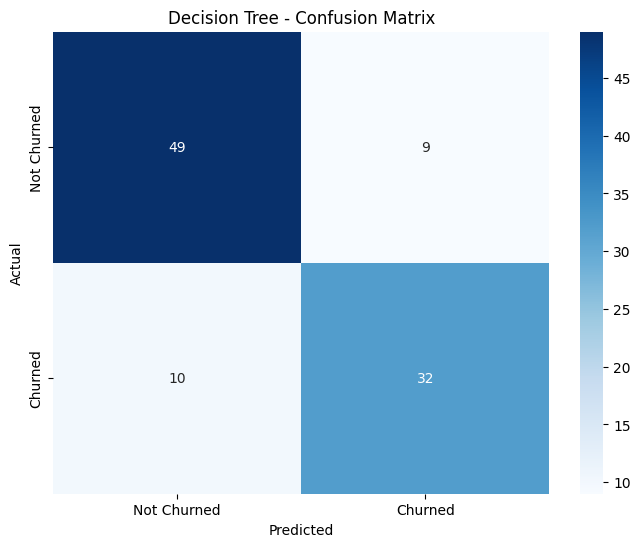

Decision Tree - Precision: 0.7804878048780488
Decision Tree - Recall: 0.7619047619047619
Decision Tree - F1 Score: 0.7710843373493976
Decision Tree - ROC AUC Score: 0.8033661740558292


In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#X_train_pca
#X_test_pca

# Sample size
sample_size = 100

# Randomly select indices for sampling
sample_indices = np.random.choice(len(y_test), sample_size, replace=False)

# Sampled data
y_test_sample = y_test.iloc[sample_indices]
X_test_sample = X_test_pca[sample_indices]

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_pca, y_train)
y_pred_sample_dt = dt_classifier.predict(X_test_sample)

# Decision Tree Evaluation Metrics
precision_sample_dt = precision_score(y_test_sample, y_pred_sample_dt)
recall_sample_dt = recall_score(y_test_sample, y_pred_sample_dt)
f1_sample_dt = f1_score(y_test_sample, y_pred_sample_dt)
cm_dt_sample = confusion_matrix(y_test_sample, y_pred_sample_dt)
y_prob_dt_sample = dt_classifier.predict_proba(X_test_sample)[:, 1]
roc_auc_dt_sample = roc_auc_score(y_test_sample, y_prob_dt_sample)

# Display Confusion Matrix as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt_sample, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.title('Decision Tree - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Decision Tree - Precision:", precision_sample_dt)
print("Decision Tree - Recall:", recall_sample_dt)
print("Decision Tree - F1 Score:", f1_sample_dt)
print("Decision Tree - ROC AUC Score:", roc_auc_dt_sample)



# **Survival analysis**

## Kaplan Meier and Cox Propotional Hazard Model

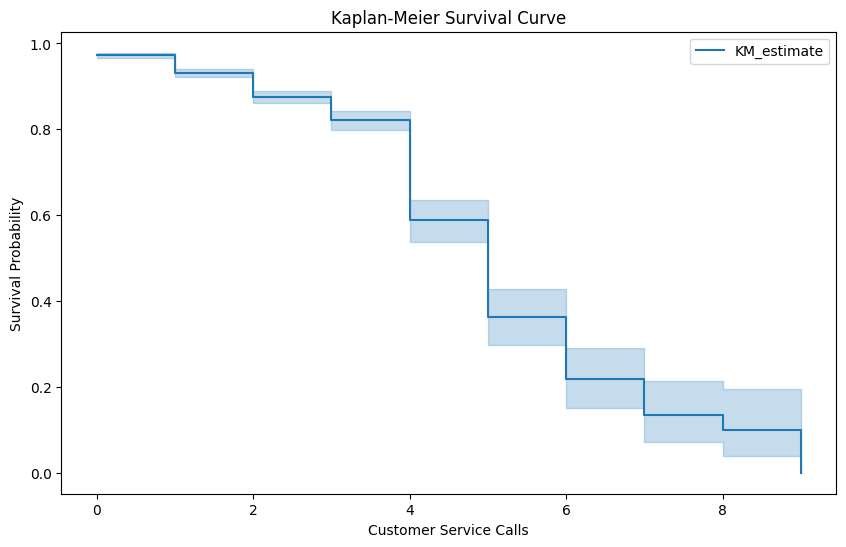

<lifelines.CoxPHFitter: fitted with 3053 total observations, 2619 right-censored observations>
             duration col = 'Customer service calls'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 3053
number of events observed = 434
   partial log-likelihood = -2699.18
         time fit was run = 2024-12-16 22:20:35 UTC

---
                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                              
International plan     1.50      4.48      0.11            1.28            1.72                3.59                5.58
Number vmail messages -0.03      0.97      0.00           -0.04           -0.02                0.96                0.98
Total day minutes      0.01      1.01      0.00            0.01            0.01                1.01                1.01
Total eve minutes      0.00      1.00      0.00            0.00            0.01                1.00                1.01
Total night minutes    0.00      1.00      0.00            0.00            0.00                1.00                1.00
Total intl minutes     0.05      1.05      0.02            0.01            0.09                1.01                1.09
Total intl calls      -0.10      0.91      0.03           -0.15           -0.05                0.86                0.95
State_AZ              -0.40      0.67      0.50           -1.39            0.58                0.25                1.79
State_CA               1.19      3.29      0.34            0.53            1.86                1.69                6.41
State_MD               0.07      1.07      0.26           -0.44            0.57                0.64                1.78
State_MT               1.16      3.19      0.28            0.62            1.70                1.86                5.48
State_NJ               0.51      1.67      0.25            0.01            1.01                1.01                2.75
State_SC               0.84      2.32      0.30            0.26            1.43                1.30                4.16
State_TX               0.85      2.35      0.26            0.35            1.36                1.41                3.89
State_VA              -0.87      0.42      0.50           -1.86            0.11                0.16                1.12
State_WA               0.69      1.99      0.27            0.15            1.23                1.16                3.42

                       cmp to     z      p  -log2(p)
covariate                                           
International plan       0.00 13.36 <0.005    132.77
Number vmail messages    0.00 -6.23 <0.005     30.97
Total day minutes        0.00 10.13 <0.005     77.65
Total eve minutes        0.00  4.57 <0.005     17.65
Total night minutes      0.00  2.51   0.01      6.37
Total intl minutes       0.00  2.56   0.01      6.59
Total intl calls         0.00 -3.85 <0.005     13.02
State_AZ                 0.00 -0.80   0.42      1.24
State_CA                 0.00  3.51 <0.005     11.14
State_MD                 0.00  0.26   0.80      0.33
State_MT                 0.00  4.20 <0.005     15.17
State_NJ                 0.00  2.02   0.04      4.52
State_SC                 0.00  2.84 <0.005      7.80
State_TX                 0.00  3.29 <0.005      9.99
State_VA                 0.00 -1.73   0.08      3.59
State_WA                 0.00  2.51   0.01      6.37
---
Concordance = 0.83
Partial AIC = 5430.36
log-likelihood ratio test = 373.08 on 16 df
-log2(p) of ll-ratio test = 228.56

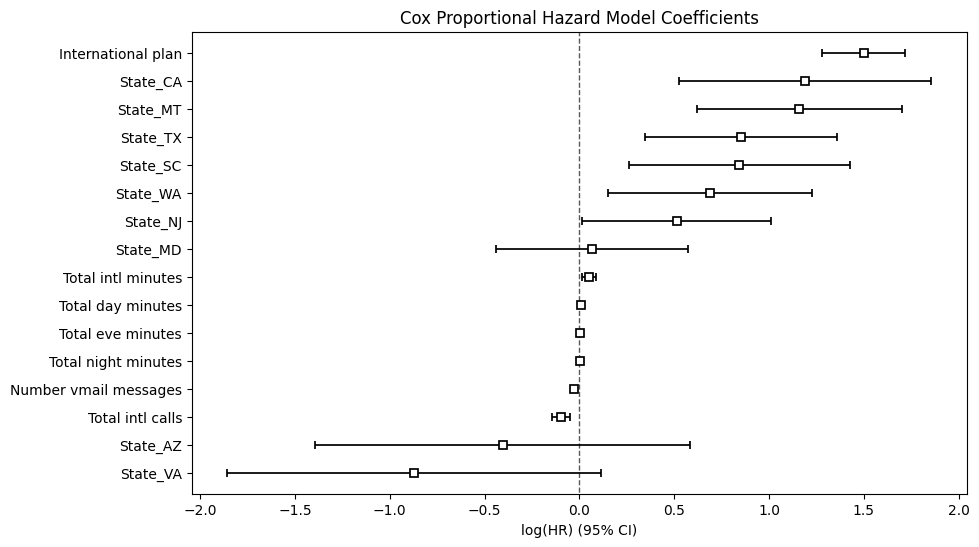

<Figure size 1000x600 with 0 Axes>

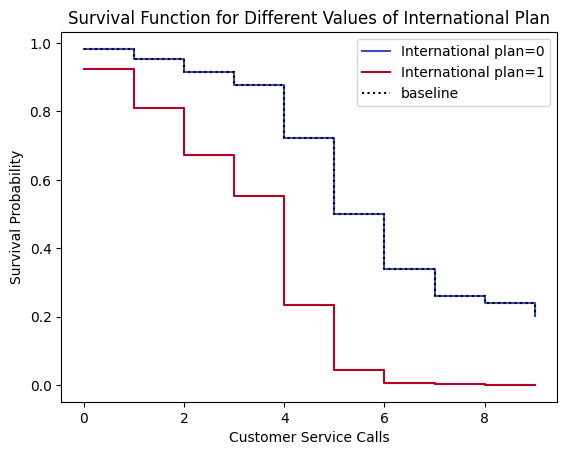

In [110]:
# Install lifelines package
!pip install lifelines

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, CoxPHFitter

# Assuming combined_df_cleaned is already defined

# Prepare the data for survival analysis
# For this example, let's assume 'Customer service calls' is the duration a customer stays with the service
# and 'Churn' is the event of interest (1 if churned, 0 otherwise)

# Create a Kaplan-Meier fitter instance
kmf = KaplanMeierFitter()

# Fit the data into the Kaplan-Meier fitter
kmf.fit(durations=combined_df_cleaned['Customer service calls'], event_observed=combined_df_cleaned['Churn'])

# Plot the survival function
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Customer Service Calls')
plt.ylabel('Survival Probability')
plt.show()

# Prepare the data for Cox Proportional Hazard Model
# We will use all features except 'Churn' and 'Customer service calls' as covariates
covariates = combined_df_cleaned.drop(columns=['Churn', 'Customer service calls'])

# Add 'Customer service calls' and 'Churn' back to the dataset for CoxPHFitter
cox_data = covariates.copy()
cox_data['Customer service calls'] = combined_df_cleaned['Customer service calls']
cox_data['Churn'] = combined_df_cleaned['Churn']

# Create a Cox Proportional Hazard fitter instance
cph = CoxPHFitter()

# Fit the data into the Cox Proportional Hazard fitter
cph.fit(cox_data, duration_col='Customer service calls', event_col='Churn')

# Print the summary of the Cox Proportional Hazard model
cph.print_summary()

# Plot the coefficients of the Cox Proportional Hazard model
plt.figure(figsize=(10, 6))
cph.plot()
plt.title('Cox Proportional Hazard Model Coefficients')
plt.show()

# Plot the survival function for different covariate values (e.g., International plan)
plt.figure(figsize=(10, 6))
cph.plot_partial_effects_on_outcome(covariates='International plan', values=[0, 1], cmap='coolwarm')
plt.title('Survival Function for Different Values of International Plan')
plt.xlabel('Customer Service Calls')
plt.ylabel('Survival Probability')
plt.show()

# **Retention strategy**

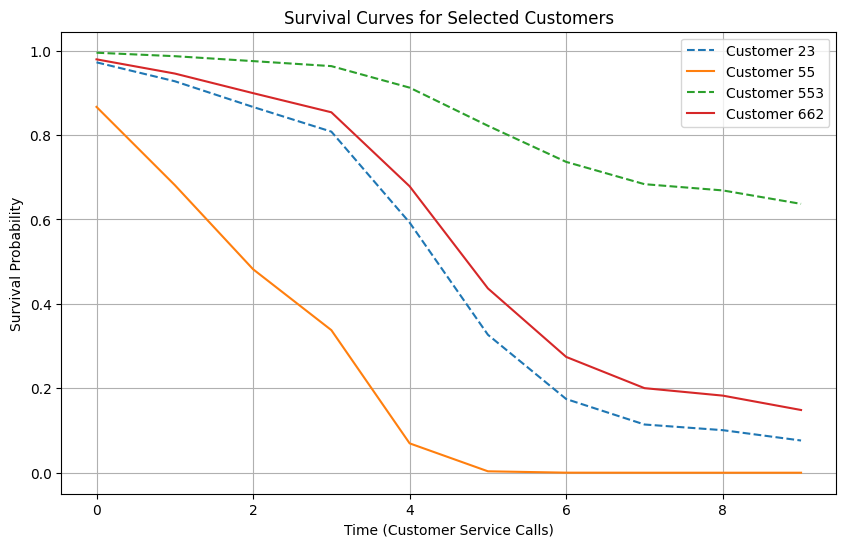

In [111]:
# Step 9: Visualize the survival function for a few specific customers
# Choose a few specific customers (e.g., customers with index 10, 50, and 100)
customers_to_plot = cox_data.iloc[[20, 50, 500, 600]]

# Predict the survival functions for these customers
survival_functions = cph.predict_survival_function(customers_to_plot)

# Step 10: Plot the survival curves for the selected customers
plt.figure(figsize=(10, 6))

# Loop through the survival functions and plot each
for i, customer in enumerate(customers_to_plot.index):
    plt.plot(survival_functions.index, survival_functions.iloc[:, i], label=f'Customer {customer}', linestyle='--' if i % 2 == 0 else '-')

# Add labels and title
plt.title('Survival Curves for Selected Customers')
plt.xlabel('Time (Customer Service Calls)')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()